In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

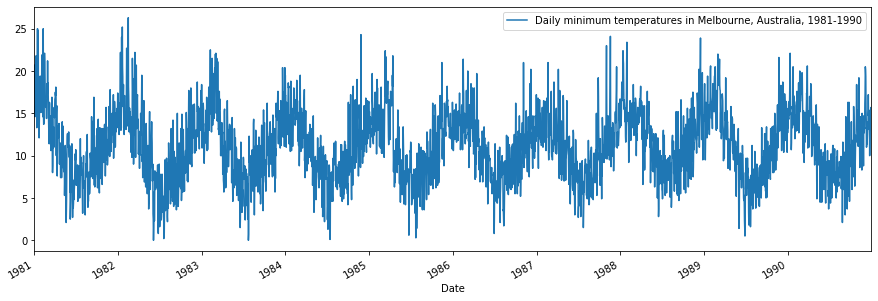

In [2]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/daily-temp.csv'

df = pd.read_csv(path, parse_dates=['Date'], index_col='Date')
df.plot(figsize=(15, 5));

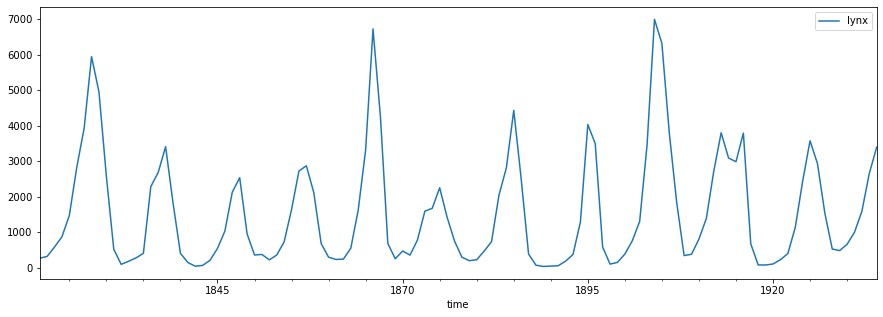

In [3]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/lynx.csv'

df = pd.read_csv(path, parse_dates=['time'], index_col='time')
df.plot(figsize=(15, 5));

In [4]:
path = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv'

df = pd.read_csv(path)

In [5]:
#we merge the data, which together are to form a non-broken date record
df.apply( lambda row: (int(row['year']), int(row['month']), int(row['day'])), axis=1 )
#axis=1 means that we take row number 0, then number 1 and then 2..3..ect.
#row: give us access to gives us access to individual row's elements egz. year, day
#int() we get rid of commas after the number

0        (1974, 5, 19)
1        (1974, 5, 26)
2         (1974, 6, 2)
3         (1974, 6, 9)
4        (1974, 6, 16)
             ...      
2316     (2018, 10, 7)
2317    (2018, 10, 14)
2318    (2018, 10, 21)
2319    (2018, 10, 28)
2320     (2018, 11, 4)
Length: 2321, dtype: object

# We  change the data format

In [6]:
df.apply( lambda row: '{}-{}-{}'.format(int(row['year']), int(row['month']), int(row['day'])), axis=1 )

0        1974-5-19
1        1974-5-26
2         1974-6-2
3         1974-6-9
4        1974-6-16
           ...    
2316     2018-10-7
2317    2018-10-14
2318    2018-10-21
2319    2018-10-28
2320     2018-11-4
Length: 2321, dtype: object

In [21]:
df['date'] = df.apply( lambda row: '{}-{}-{}'.format(int(row['year']), int(row['month']), int(row['day'])), axis=1 )

df['date'] = pd.to_datetime(df['date'] )
df.index = df['date']

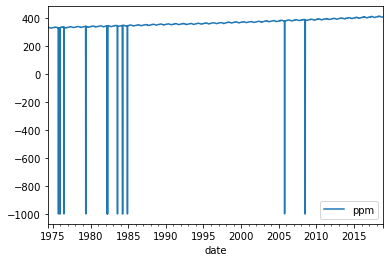

In [22]:
df[ ['ppm'] ].plot();

# We change the data format - easier way

In [19]:
df.index = pd.to_datetime(df[['year', 'month', 'day']] )


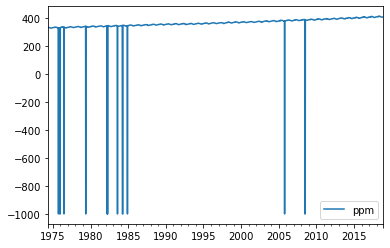

In [20]:
df[ ['ppm'] ].plot();

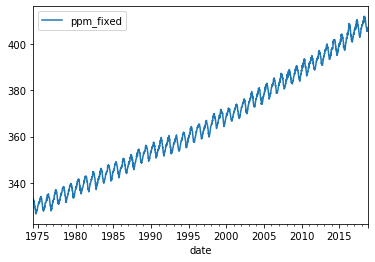

In [26]:
#fixed go through all values lambda x
df['ppm_fixed'] = df['ppm'].map(lambda x: np.nan if x < 0 else x).fillna( method='backfill' ) 
df[ ['ppm_fixed'] ].plot();

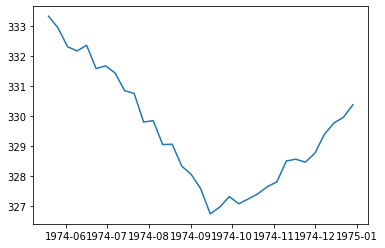

In [29]:
df1974 = df[ df.year == 1974 ]

plt.plot(df1974.index, df1974['ppm_fixed'])

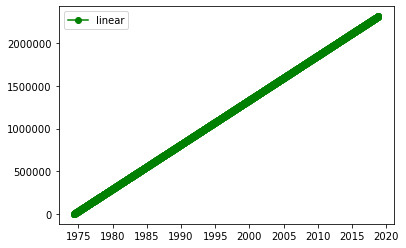

In [41]:
def linear_func(year, k=None, b=0): 
    mean_value = np.mean(year)
    if k is None:
        return[mean_value] * len(year)
    
    return[idx*k+b for idx, _ in enumerate(year)]


plt.plot( df.index, linear_func(df.year, k=1000, b=-1170), 'o-', c='g', label='linear');
plt.legend();

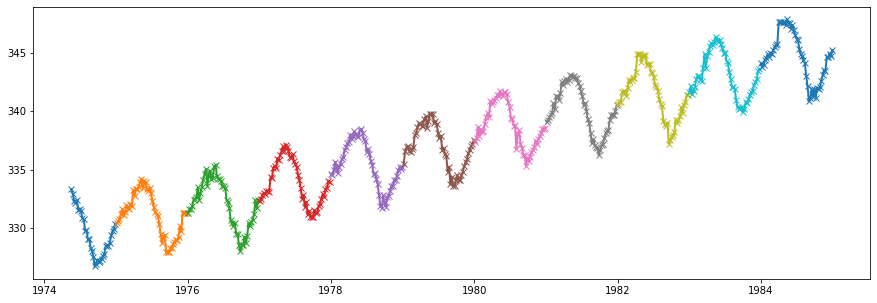

In [48]:

plt.figure(figsize=(15, 5))
for year in range(1974, 1985):
    df_year = df[ df.year == year ]
    plt.plot(df_year.index, df_year['ppm_fixed'], 'x-', label=year, linewidth=2);
plt.legend;
